In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
A = np.array([[-11, 9], [9, -11]])
print("A :\n" , A)
U0 = np.array([1,1.2])
print("U0 :\n" , U0)

A :
 [[-11   9]
 [  9 -11]]
U0 :
 [1.  1.2]


In [5]:
# compute eigenvalues and eigenvectors
# R is the matrix of eigenvectors
e_vals, R = np.linalg.eig(A)
# matrix of eigenvalues
D = np.diag(e_vals)

In [ ]:
# exact solution
u_exact = lambda t : 

### Forward Euler on the system $u' = Au$, with $u(0) = (1.0,1.2)$

In [14]:
def forward_euler(u0, k, t):
    T = int(t/k)+1
    v = np.zeros((np.shape(u0)[0],T))
    u = np.zeros((np.shape(u0)[0],T))
    v[:,0] = np.linalg.inv(R) @ u0
    u[:,0] = u0
    for i in range(T-1):
        v[:,i+1] = v[:,i] + k*(D @ v[:,i])
        u[:,i+1] = R @ v[:,i+1]
    return u

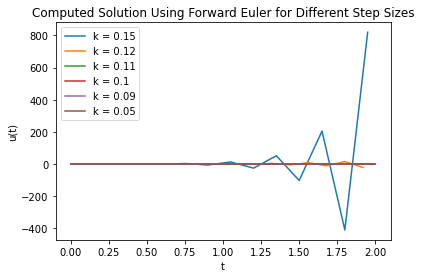

In [56]:
K = [0.15, 0.12, 0.11, 0.1, 0.09, 0.05]
colors = ['b', 'g', 'r', 'c', 'm', "purple" ]
t = 2
# array of solutions
U1 = []

# compute solutions
for k in K:
    U1.append(forward_euler(U0, k, t))

# plot solutions
for i in range(len(K)):
    times = [K[i]*j for j in range(int(t/K[i]) + 1)]
    plt.plot(times, U1[i][0,:], label = "k = " + str(K[i]))
plt.title("Computed Solution Using Forward Euler for Different Step Sizes")
plt.ylabel("u(t)")
plt.xlabel("t")
plt.legend()
plt.show()

### Backward Euler on the system $u' = Au$, with $u(0) = (1.0,1.2)$


In [21]:
def backward_euler(u0, k, t):
    d = np.shape(u0)[0]
    T = int(t/k) + 1
    M = np.linalg.inv(np.identity(d) - k*D)
    v = np.zeros((d,T))
    u = np.zeros((d,T))
    v[:,0] = np.linalg.inv(R) @ u0
    u[:,0] = u0.copy()
    for i in range(T-1):
        v[:,i+1] = M @ v[:,i]
        u[:, i+1] = R @ v[:,i+1]
    return u

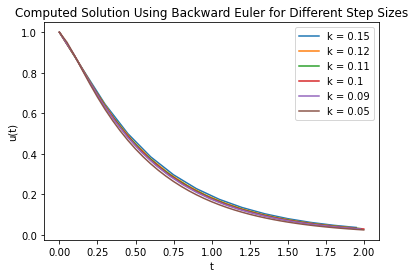

In [60]:
K = [0.15, 0.12, 0.11, 0.1, 0.09, 0.05]
t = 2

# array of solutions
U2 = []

# compute solutions
for k in K:
    U2.append(backward_euler(U0, k, t))

# plot solutions
for i in range(len(K)):
    plt.plot([K[i]*j for j in range(int(t/K[i])+1)], U2[i][0,:], label = "k = " + str(K[i]))
plt.title("Computed Solution Using Backward Euler for Different Step Sizes")
plt.ylabel("u(t)")
plt.xlabel("t")
plt.legend()
plt.show()

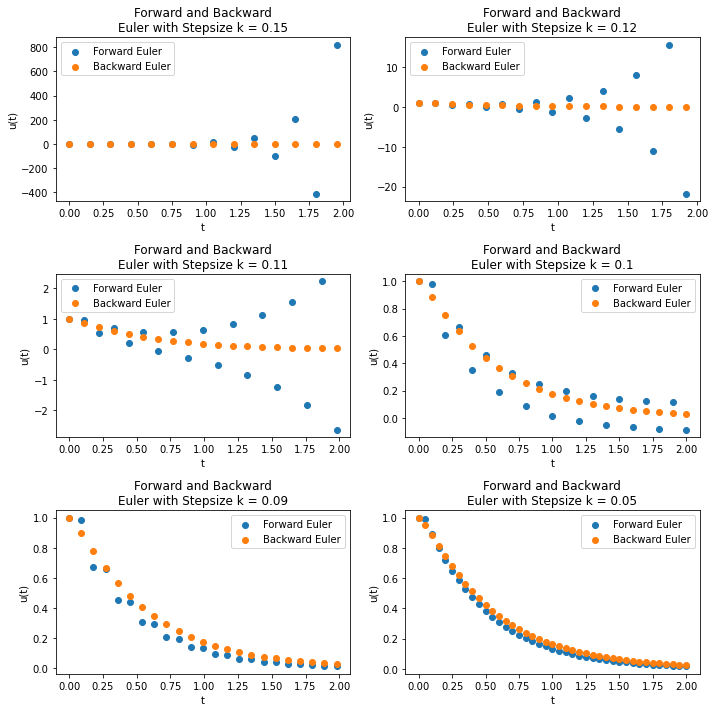

In [58]:
fig, ax = plt.subplots(3,2, figsize = (10,10))

for i in range(3):
    for j in range(2):
        index = i*2 + j
        ax[i,j].set_title("Forward and Backward\nEuler with Stepsize k = " + str(K[index]) )
        ax[i,j].scatter([K[index]*r for r in range(int(t/K[index])+1)], U1[index][0,:], label = "Forward Euler")
        ax[i,j].scatter([K[index]*r for r in range(int(t/K[index])+1)], U2[index][0,:], label = "Backward Euler")
        #ax[i,j].plot([K[index]*r for r in range(int(t/K[index])+1)], )
        ax[i,j].set_ylabel("u(t)")
        ax[i,j].set_xlabel("t")
        ax[i,j].legend()
plt.tight_layout()
plt.show()

### Discussion

We see that backward Euler does better with larger step sizes. This is because large stepsizes for forward Euler with large eigenvalues can lie outside of the region of stability of the method. Backward Euler, however is absolutely stable and has comparable performance with relatively large step sizes.